In [79]:
import csv
import numpy as np
import scipy as sp
import matplotlib
from matplotlib import pyplot as plt

In [80]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
#############
## DATA IO ##
#############


def get_data(filepath):

    # Opens the file handler for the dataset file. Using variable 'f' we can access and manipulate our file anywhere in our code
    # after the next code line.

    f = open(filepath, 'r')

    # Predictors Collection (or your input variable) (which in this case is just the duration of eruption)

    x1 = []
    x2 = []
    x3 = []
    x4 = []


    # Output Response (or your output variable) (which in this case is the duration after which next eruption will occur.)

    y = []

    # Initializing a reader generator using reader method from csv module. A reader generator takes each line from the file
    # and converts it into list of columns.

    reader = csv.reader(f)

    # Using for loop, we are able to read one row at a time.

    # Iris-setosa
    # Iris-versicolor
    # Iris-virginica

    for row in reader:
        x1.append(float(row[0]))
        x2.append(float(row[1]))
        x3.append(float(row[2]))
        x4.append(float(row[3]))
        #print(row[3])
        if(row[4] == 'Iris-setosa'):
            y.append(1)
        else:
            y.append(0)

    # Close the file once we have succesffuly stored all data into our X and Y variables.

    f.close()

    X = [x1,x2,x3,x4]
    # Normalization of Input Data.
    mean = []
    std = []
    for i in range(0,4):
        X[i] = np.array(X[i])
        mean.append(np.mean(X[i]))
        std.append(np.std(X[i]))
        
    
    
    # Returning Normalized Input Data 
    return [np.array([(X[i] - mean[i])/(std[i]) for i in range(0,4)]),np.array(y),mean,std]

#     return [[
#         np.array(x1),
#         np.array(x2),
#         np.array(x3),
#         np.array(x4)
#         ], np.array(y)]
    


In [81]:
import math
def sigmoid(value):
    return (1/(1+math.exp(-1*value)))
    

In [82]:
#####################
## RSS Calculation ##
#####################

def Cost(x, y, betas):
    rss = 0
    for i in range(x[0].shape[0]):
        predicted_value = (betas[0] + (betas[1] * x[0][i]) + (betas[2] * x[1][i]) + (betas[3] * x[2][i]) + (betas[4] * x[3][i]))
        actual_value = y[i]
        y_ = (sigmoid(predicted_value))
        rss = rss + ((-y*np.log(y_))-((1-y)*np.log(1-y_)))
    #print(rss.shape)
    return (rss) #/x[0].shape[0]

In [83]:
def compute_gradient(betas, x,index):
    val = (betas[0]) + (betas[1]*x[0][index]) + (betas[2]*x[1][index]) + (betas[3]*x[2][index]) + (betas[4]*x[3][index])
    val = sigmoid(val)
    return val

In [84]:
def gradientDescentAlgorithm(x, y, learning_rate):
    
    print ("Training Linear Regression Model using Gradient Descent")
    
    maximum_iterations = 100
    
    # This flag lets the program know wether the gradient descent algorithm has reached it's converged state which means wether 
    # the algorithm was able to find the local minima (where the slope of RSS wrt your parameters beta_0 and beta_1 is zero)
    converge_status = False
    
    # num_rows stores the number of datapoints in the current dataset provided for training.
    num_rows = x[0].shape[0]

    # Initial Value of parameters 
    betas = [0,0,0,0,0]
    
    # Initial Error or RSS(beta_0,beta_1) based on the initial parameter values
    #error = RSS(x, y, beta_0, beta_1)
    error = Cost(x, y, betas)
    print('Initial Value (Cost Function)=', error.shape);
    
    # Iterate Loop
    num_iter = 0
    while not converge_status:
        # for each training sample, compute the gradient (d/d_beta j(beta))
        gradient_0 = 1.0/num_rows * sum([(compute_gradient(betas,x,i) - y[i]) for i in range(num_rows)]) 
        gradient_1 = 1.0/num_rows * sum([(compute_gradient(betas,x,i) - y[i])*x[0][i] for i in range(num_rows)])
        gradient_2 = 1.0/num_rows * sum([(compute_gradient(betas,x,i) - y[i])*x[1][i] for i in range(num_rows)]) 
        gradient_3 = 1.0/num_rows * sum([(compute_gradient(betas,x,i) - y[i])*x[2][i] for i in range(num_rows)])
        gradient_4 = 1.0/num_rows * sum([(compute_gradient(betas,x,i) - y[i])*x[3][i] for i in range(num_rows)]) 


        
        
        # Computation of new parameters according to the current gradient.
        temp0 = betas[0] - learning_rate * gradient_0
        temp1 = betas[1] - learning_rate * gradient_1
        temp2 = betas[2] - learning_rate * gradient_2
        temp3 = betas[3] - learning_rate * gradient_3
        temp4 = betas[4] - learning_rate * gradient_4

    
        # Simultaneous Update of Parameters Beta_0 and Beta_1.
        betas[0] = temp0
        betas[1] = temp1
        betas[2] = temp2
        betas[3] = temp3
        betas[4] = temp4


        
        current_error = Cost(x, y, betas)
        
        if num_iter % 10 == 0:
            print ('Current Value of RSS (Cost Function) based on updated values= ',  current_error)
            
        error = current_error   # update error 
        num_iter = num_iter + 1  # update iter
    
        if num_iter == maximum_iterations:
            print ("Training Interrupted as Maximum number of iterations were crossed.\n\n")
            converge_status = True
    return [betas[0], betas[1],betas[2],betas[3],betas[4]]

In [91]:
# Method to predict response variable Y for new values of X  using the estimated coefficients.
# This method can predict Response variable (Y) for single as well as multiple values of X. If only a single numerical Value
# input variable (X). It will return the prediction for only that single numerical
# value. If a collection of different values for input variable (list) is passed, it will return a list of predictions
# for each input value.
# "if" statement on line number 155 takes care of understanding if the input value is singular or a list.


def predict(coef,X):
    beta_0 = coef[0]
    beta_1 = coef[1]
    beta_2 = coef[2]
    beta_3 = coef[3]
    beta_4 = coef[4]

    
    print('----',len(X))
    
    fy = []
    if len(X) > 1:
        for x in X:
            sum = (beta_0 + (beta_1 * x[0])+ (beta_2 * x[1]) + (beta_3 * x[2]) + (beta_4 * x[3]) )
            fy.append(sigmoid(sum))
        return fy
    
    # Our Regression Model defined using the coefficients from slr function
    x = X[0]
    Y = sigmoid(beta_0 + (beta_1 * x[0]) + (beta_2 * x[1]) + (beta_3 * x[2]) + (beta_4 * x[3]))

    return Y

In [92]:
from mpl_toolkits.mplot3d import Axes3D
def graph(X):
    a = X[0]
    b = X[1]
    c = X[2]
    
    
    fig = plt.figure()
    ax = Axes3D(fig)
    
    ax.scatter(a,b,c)
    plt.show()


    
    

In [93]:
a = np.array([12,2,3,4])
b = np.array([12,2,3,1])

c= np.array([a,b])
c[0]

array([12,  2,  3,  4])

In [94]:
# Based on Predicted Probability using logistic function and coefficients, we classify the unknown data point into 
# one of two categories using threshold.
def classify(predicted_probability,threshold = 0.5):
    if predicted_probability > threshold:
        return 1
    else:
        return 0

In [95]:
# Based on Actual Category and Predicted Category we compute the components of confusion matrix i.e
# TP - True Positive [Model - Setosa, Actual - Setosa]
# FP - False Positive [Model - Setosa, Actual - Non Setosa]
# TN - True Negative [Model - Non Setosa, Actual - Non Setosa]
# FN - False Negative [Model - Non Setosa, Actual - Setosa]
def get_confusion_matrix(test_Y,pred_Y):
    tp = (pred_Y[test_Y == 1])
    tp = tp[tp==1]
    tp = tp.shape[0]
    
    tn = (pred_Y[test_Y == 0])
    tn = tn[tn==0]
    tn = tn.shape[0]
    
    fn = 90 - tn
    fp = 45 - tp
    
    return [tp,fp,tn,fn]
    
# Based on components of confusion matrix, we compute accuracy, precision and recall evaluation metrics.
def evaluate_performance(test_Y,pred_Y):
    tp,fp,tn,fn = get_confusion_matrix(test_Y,pred_Y)
    
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    
    # Precision of Positive class = (TP / TP + FP) 
    # Similarly precision of negative class = (TN / TN + FN)
    # Precision = Avg (Precision of Positive Class, Precision of Negative Class)
    precision = ((tp / (tp + fp)) + (tn / (tn + fn)))/2
    
    # Recall of Positive class = (TP / TP + FN) 
    # Similarly Recall of Negative class = (TN / TN + FP)
    # Recall = Avg (Recall of Positive Class, Recall of Negative Class)
    recall = ((tp/(tp+fn)) + (tn/(tn+fp)))/2
    
    return [round(accuracy*100,2),round(precision*100,2),round(recall*100,2)]
    
    
   


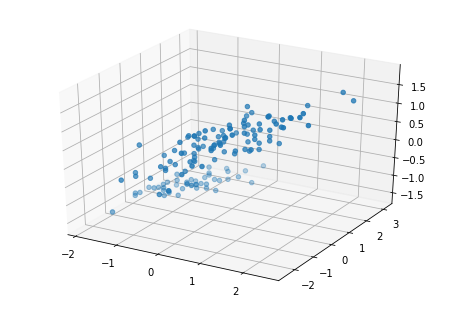

Training Linear Regression Model using Gradient Descent
Initial Value (Cost Function)= (15,)
Current Value of RSS (Cost Function) based on updated values=  [ 10.63090695  10.63090695  10.63090695  10.63090695  10.63090695
  10.24292484  10.24292484  10.24292484  10.24292484  10.24292484
  10.24292484  10.24292484  10.24292484  10.24292484  10.24292484]
Current Value of RSS (Cost Function) based on updated values=  [ 14.34839729  14.34839729  14.34839729  14.34839729  14.34839729
  10.98422743  10.98422743  10.98422743  10.98422743  10.98422743
  10.98422743  10.98422743  10.98422743  10.98422743  10.98422743]
Current Value of RSS (Cost Function) based on updated values=  [ 17.81054103  17.81054103  17.81054103  17.81054103  17.81054103
  12.43477746  12.43477746  12.43477746  12.43477746  12.43477746
  12.43477746  12.43477746  12.43477746  12.43477746  12.43477746]
Current Value of RSS (Cost Function) based on updated values=  [ 20.57963961  20.57963961  20.57963961  20.57963961  20.5

In [96]:
X,Y,mean,std = get_data("../Dataset/iris.csv")

graph(X)

train_X = np.concatenate((X[:,0:5],X[:,50:55],X[:,100:105]),1)
test_X = np.concatenate((X[:,5:50],X[:,55:100],X[:,105:150]),1)

train_Y = np.concatenate((Y[0:5],Y[50:55],Y[100:105]),0)
test_Y = np.concatenate((Y[5:50],Y[55:100],Y[105:150]),0)

################################################
## Model Training (or coefficient estimation) ##
################################################
# Using our gradient descent function we estimate coefficients of our regression line. The gradient descent function returns a list of 
# coefficients

coefficients = gradientDescentAlgorithm(train_X,train_Y,0.1)

########################
## Making Predictions ##
########################

# Using our predict function and the coefficients given by our slr function we can now predict the time it will take
# for the next eruption.
print ("Final Values for Beta Parameters are (from beta_0 to beta_4) :",coefficients)


#print ("prediction",predict(coefficients,[[4.9,3.0,1.4,0.2],[4.9,3.0,1.4,0.2]]))
pred_Y = []


for i in range(0,np.transpose(test_X).shape[0]):
    probability = predict(coefficients,[np.transpose(test_X)[i]])
    pred_Y.append(classify(probability))
    
pred_Y = np.array(pred_Y)
    
accuracy,precision,recall = evaluate_performance(test_Y,pred_Y)

print ("Accuracy:",accuracy,"Precision:",precision,"Recall:",recall)